In [1]:
from utils import run
import seaborn as sns

from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica

In [5]:
base_dir = './benchmark_data_'

### n_ops

In [8]:
df = run(
    [4], [4], [10_000], list(range(100, 1_000, 100)),
    [Uniform, Zipfian, HotSet], [{'seed': [1]}, {'seed': [1]}, {'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [
        {
            'max_runs_per_level': [3],
            'density_factor': [10],
            'memtable_bytes_limit': [10_000],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'mem_segment_len': [1_000],
            'ro_lag_interval': [100],
            'flush_interval': [100],
            'hash_index': ['dict'],
            'compaction_enabled': [False],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'threshold': [10_000],
            'replica': [None]
        }
    ],
    times=1, base_dir=base_dir,
    measure_cpu=True, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

In [29]:
def lineplot(cat, engine, x, y, data, hue=None, style=None, X='', Y='', title='', ylim=None):
    data = data[data['metric'].isin(y)]
    plot = sns.lineplot(data=data, x=x, y='value', hue=hue, style=style)
    if title:
        plot.set_title(f'{Y} vs {X}')
    if X:
        plot.set_xlabel(X)
    if Y:
        plot.set_ylabel(Y)
    if ylim is not None:
        plot.set(ylim=ylim)
    fig = plot.get_figure()
    fig.savefig(f"{cat}-{engine}-{'_'.join(y)}-vs-{x}.png")

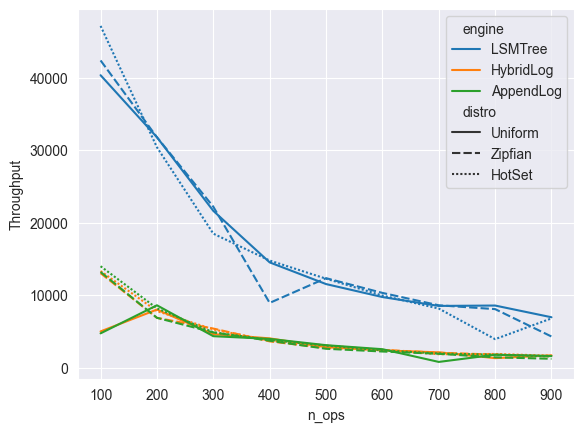

In [15]:
lineplot(
    'B', 'ALL',
    'n_ops', ['read_t'],
    df[['value', 'n_ops', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_ops', 'Throughput'
)

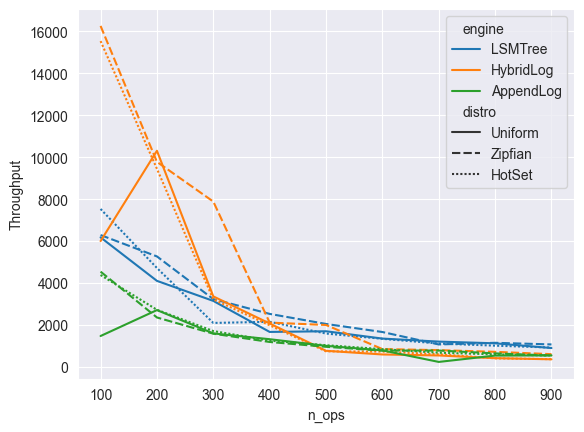

In [16]:
lineplot(
    'B', 'ALL',
    'n_ops', ['write_t'],
    df[['value', 'n_ops', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_ops', 'Throughput'
)

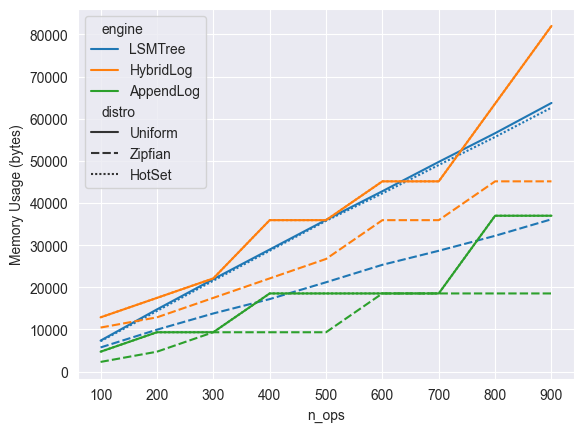

In [17]:
lineplot(
    'B', 'ALL',
    'n_ops', ['mem'],
    df[['value', 'n_ops', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_ops', 'Memory Usage (bytes)'
)

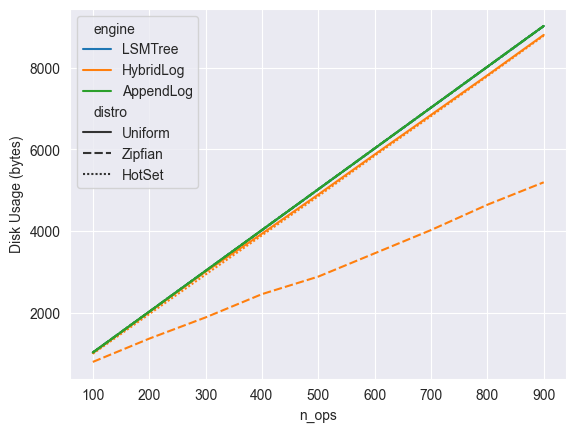

In [18]:
lineplot(
    'B', 'ALL',
    'n_ops', ['disk_local'],
    df[['value', 'n_ops', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_ops', 'Disk Usage (bytes)'
)

#### n_items

In [21]:
df = run(
    [4], [4], list(range(100, 1_000, 100)), [10_000],
    [Uniform, Zipfian, HotSet], [{'seed': [1]}, {'seed': [1]}, {'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [
        {
            'max_runs_per_level': [3],
            'density_factor': [10],
            'memtable_bytes_limit': [10_000],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'mem_segment_len': [1_000],
            'ro_lag_interval': [100],
            'flush_interval': [100],
            'hash_index': ['dict'],
            'compaction_enabled': [False],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'threshold': [10_000],
            'replica': [None]
        }
    ],
    times=1, base_dir=base_dir,
    measure_cpu=True, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

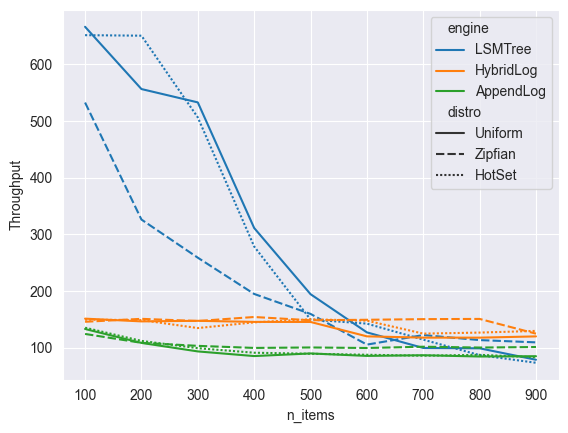

In [24]:
lineplot(
    'B', 'ALL',
    'n_items', ['read_t'],
    df[['value', 'n_items', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_items', 'Throughput'
)

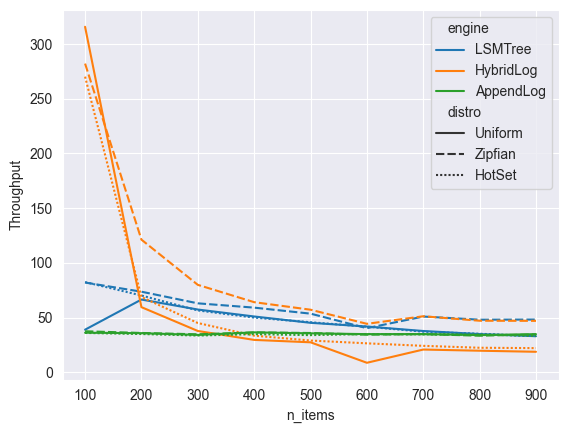

In [25]:
lineplot(
    'B', 'ALL',
    'n_items', ['write_t'],
    df[['value', 'n_items', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_items', 'Throughput'
)

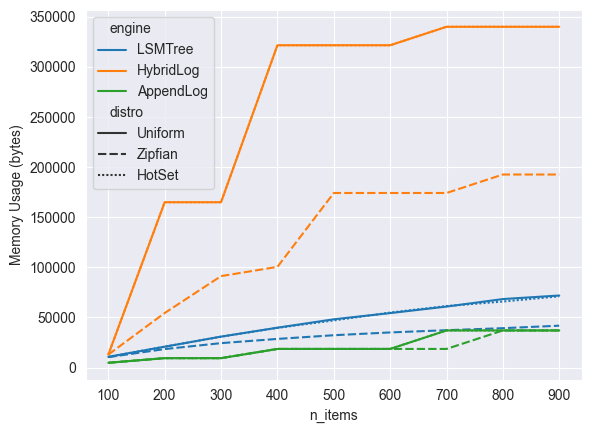

In [26]:
lineplot(
    'B', 'ALL',
    'n_items', ['mem'],
    df[['value', 'n_items', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_items', 'Memory Usage (bytes)'
)

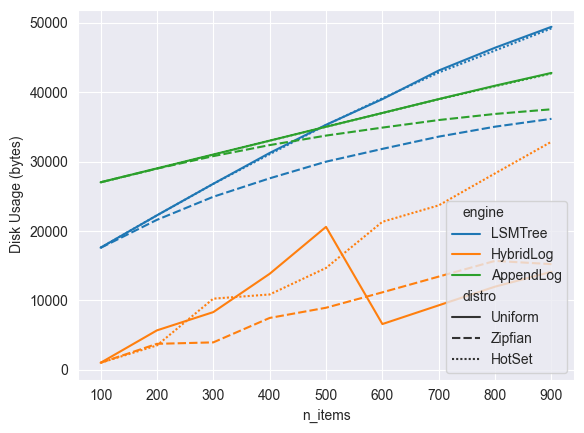

In [27]:
lineplot(
    'B', 'ALL',
    'n_items', ['disk_local'],
    df[['value', 'n_items', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'n_items', 'Disk Usage (bytes)'
)

### Key Length

In [28]:
df = run(
    list(range(10, 100, 10)), [4], [10_000], [10_000],
    [Uniform, Zipfian, HotSet], [{'seed': [1]}, {'seed': [1]}, {'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [
        {
            'max_runs_per_level': [3],
            'density_factor': [10],
            'memtable_bytes_limit': [10_000],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'mem_segment_len': [1_000],
            'ro_lag_interval': [100],
            'flush_interval': [100],
            'hash_index': ['dict'],
            'compaction_enabled': [False],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'threshold': [10_000],
            'replica': [None]
        }
    ],
    times=1, base_dir=base_dir,
    measure_cpu=True, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

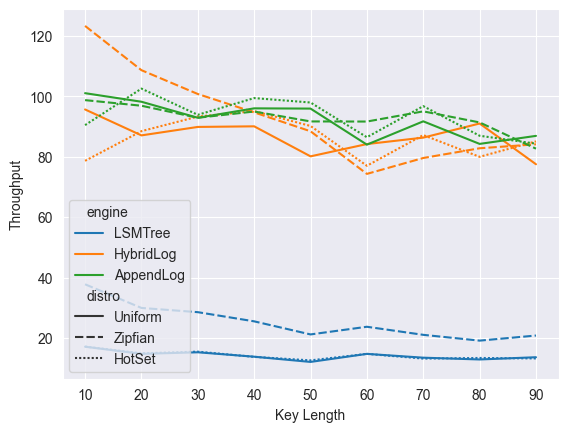

In [34]:
lineplot(
    'B', 'ALL',
    'klen', ['read_t'],
    df[['value', 'klen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'Key Length', 'Throughput'
)

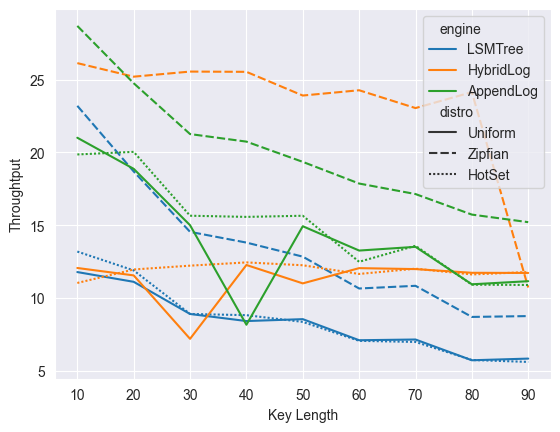

In [35]:
lineplot(
    'B', 'ALL',
    'klen', ['write_t'],
    df[['value', 'klen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'Key Length', 'Throughtput'
)

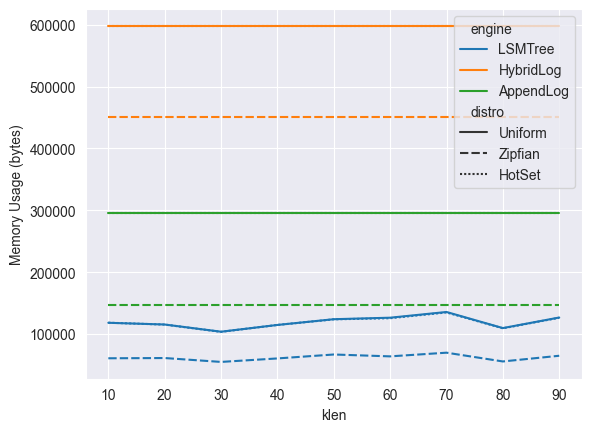

In [36]:
lineplot(
    'B', 'ALL',
    'klen', ['mem'],
    df[['value', 'klen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'klen', 'Memory Usage (bytes)'
)

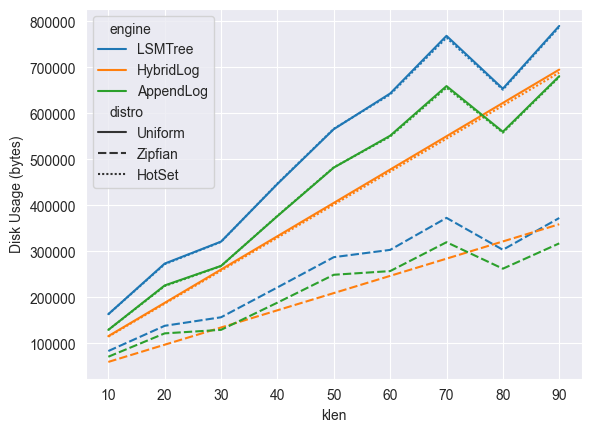

In [37]:
lineplot(
    'B', 'ALL',
    'klen', ['disk_local'],
    df[['value', 'klen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'klen', 'Disk Usage (bytes)'
)

### Value Length

In [35]:
df = run(
    [4], list(range(10, 100, 10)), [10_000], [10_000],
    [Uniform, Zipfian, HotSet], [{'seed': [2]}, {'seed': [2]}, {'seed': [2]}],
    [LSMTree, HybridLog, AppendLog], [
        {
            'max_runs_per_level': [3],
            'density_factor': [10],
            'memtable_bytes_limit': [10_000],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'mem_segment_len': [1_000],
            'ro_lag_interval': [100],
            'flush_interval': [100],
            'hash_index': ['dict'],
            'compaction_enabled': [False],
            'replica': [None]
        },
        {
            'max_runs_per_level': [3],
            'threshold': [10_000],
            'replica': [None]
        }
    ],
    times=1, base_dir=base_dir,
    measure_cpu=True, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

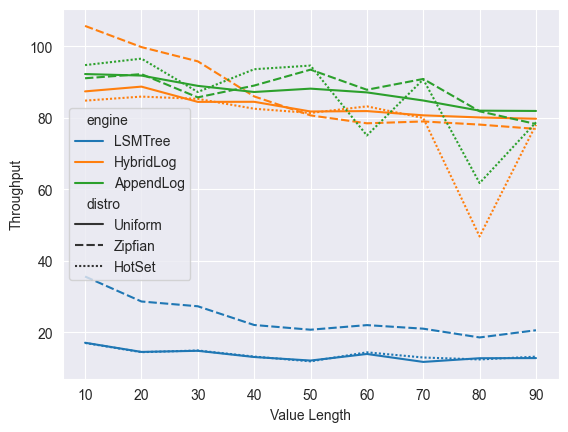

In [36]:
lineplot(
    'B', 'ALL',
    'vlen', ['read_t'],
    df[['value', 'vlen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'Value Length', 'Throughput'
)

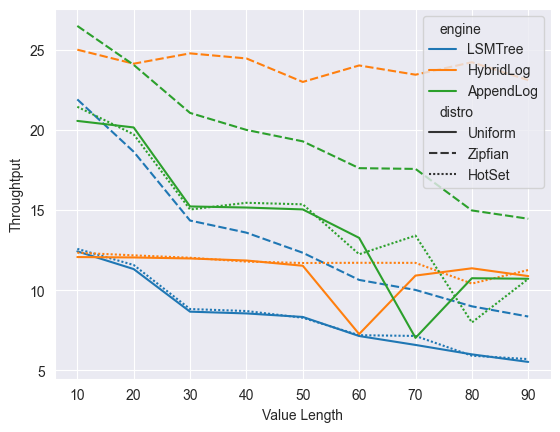

In [37]:
lineplot(
    'B', 'ALL',
    'vlen', ['write_t'],
    df[['value', 'vlen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'Value Length', 'Throughtput'
)

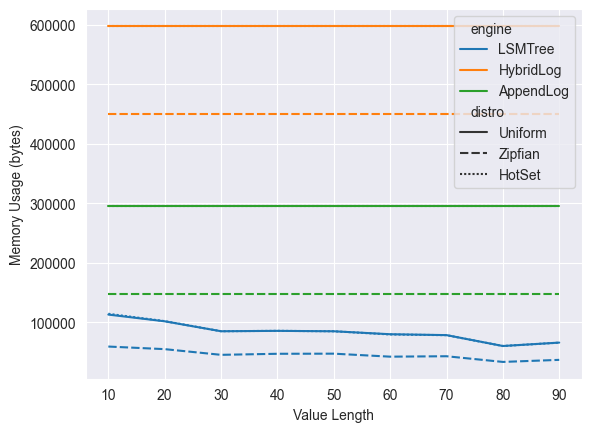

In [38]:
lineplot(
    'B', 'ALL',
    'vlen', ['mem'],
    df[['value', 'vlen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'Value Length', 'Memory Usage (bytes)'
)

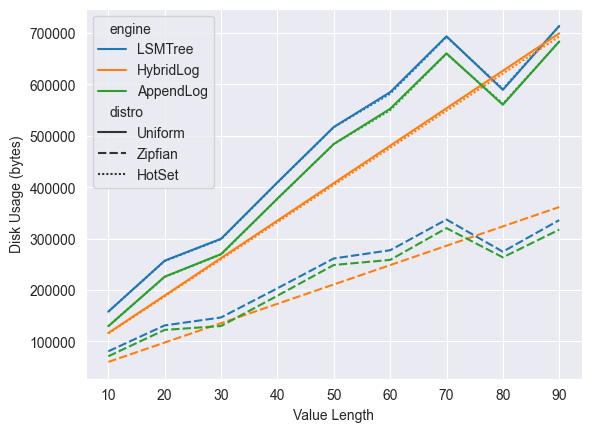

In [39]:
lineplot(
    'B', 'ALL',
    'vlen', ['disk_local'],
    df[['value', 'vlen', 'metric', 'engine', 'distro']],
    'engine', 'distro',
    'Value Length', 'Disk Usage (bytes)'
)